# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [4]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [22]:
# Your code here:
fifa.head()
len(fifa)

18207

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [10]:
# Your code here:
fifa['ValueNumeric'] = (fifa.Value.str.replace('[A-Z]*','')
                       .str.replace('^\W',''))
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype('float64')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [12]:
# Your code here:

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('ValueNumeric ~ C(fifa["Preferred Foot"])+C(fifa["Position"])',data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",7.292211e+04,1.0,0.871795,3.504713e-01
"C(fifa[""Position""])",8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:
#According to the ANOVA there are significant discrepancies between playwers based on their preferred foot and their positions.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [13]:
# Your code here:
model2 = ols('ValueNumeric ~ C(fifa["Nationality"])',data=fifa).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
#According to the ANOVA there is a significant discrepancy between playwers based on their Nationality

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [28]:
# Your code here:
fifa = fifa.dropna()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [35]:
# Your code here:
X = sm.add_constant(fifa[['Stamina','SprintSpeed']]) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Fri, 13 Sep 2019   Prob (F-statistic):             0.0116
Time:                        13:52:05   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [36]:
# Your conclusions here:
#F statistic is not sufficiently large which means the p-value will not be sufficiently small.
#This will lead us to a failure reject the null hypothesis and the conclusion that there isn't significant variation between the Speed group and the rest.
#The same cannot be said for Stamina

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [43]:
# Your code here:
X = sm.add_constant(fifa[['Potential']]) # We must add the intercept using the add_constant function
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model1 = model.summary()
print(print_model1)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 13 Sep 2019   Prob (F-statistic):          9.15e-225
Time:                        13:53:43   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [39]:
# Your conclusions here:
#F statistic is sufficiently large which means the p-value is sufficiently small.
#This will lead us to reject the null hypothesis and the conclusion that 
#there is significant variation between the groups.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

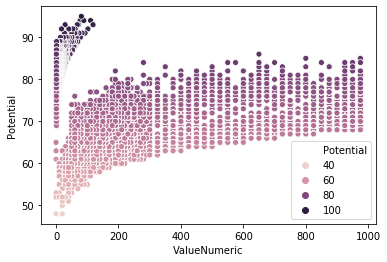

In [47]:
# Your code here:
import seaborn as sns
sns.scatterplot(x='ValueNumeric', y='Potential',hue='Potential', data=fifa)


In [ ]:
#The relationship is non-linear